In [67]:
import torch
import torch.nn 
import numpy as np
import matplotlib.pyplot as plt
import sys
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset,DataLoader, random_split

sys.path.append('./src')

%reload_ext autoreload
%autoreload 2
from train.train_cls import train_classifier
from model.classifier import BaselineClassifer
from model.attn_module import SingleHeadSelfAttention, MultiHeadSelfAttention

## Test Single Head Attention

In [38]:
# Test on a sample data
dk = 50
dv = 24
emb_dims = 128
B = 10
N = 5

x = torch.randn(size=(B,N,emb_dims)).to('cuda')
model = SingleHeadSelfAttention(emb_dims=128,dk=dk,dv=dv).to('cuda')
y = model(x)
print(y.size())

torch.Size([10, 5, 128])


# Test Multi Head Attention

In [39]:
# Build MultiHead

# Model
dk = 50
dv = 24
n_heads = 2
emb_dims = 256
B = 10
N = 5

x = torch.randn(size=(B,N,emb_dims)).to('cuda')
model = MultiHeadSelfAttention(
    n_heads=n_heads,
    emb_dims=emb_dims,
    dk=dk,
    dv=dv).to('cuda')

model(x).size()

torch.Size([10, 5, 256])

# Test Classfier

60000


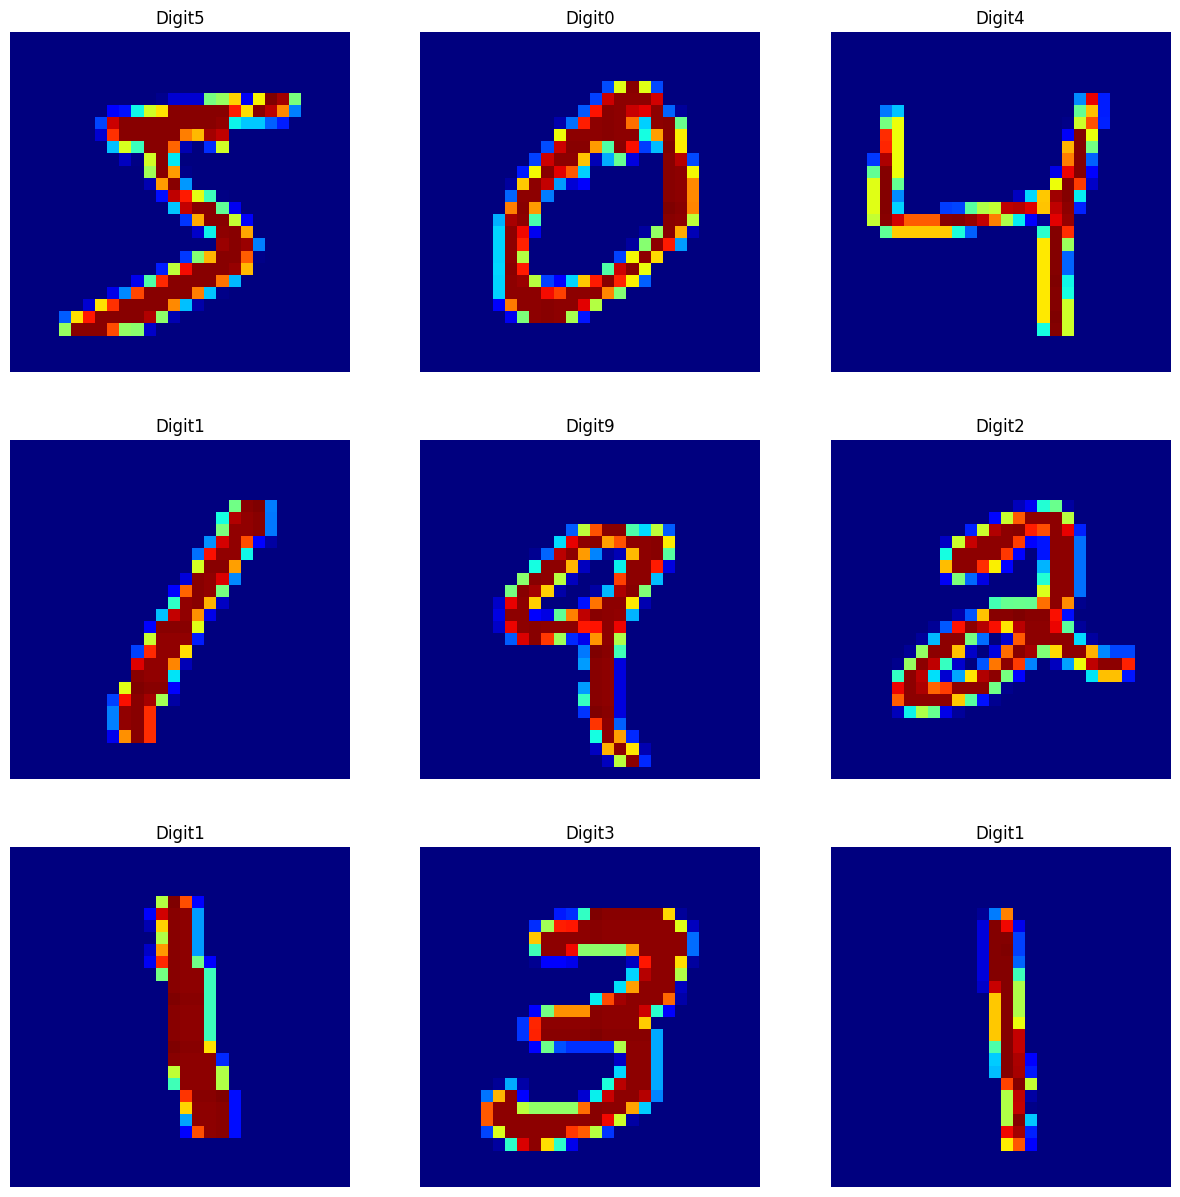

In [56]:
# Import the MNIST Data
mnist_dataset = MNIST(root='./dataset',train = True, transform = ToTensor(),download=True)

# Show some datails
print(mnist_dataset.__len__())

# Plot some ex
f,axes = plt.subplots(3,3,figsize=(15,15))
for i,ax in enumerate(np.ravel(axes)):
    x,y = mnist_dataset[i]
    ax.set_title(f'Digit{y}')
    ax.imshow(x.squeeze(),cmap='jet')
    ax.axis('off')


In [82]:
# Define Model and BatchSize
B = 128
lr = 1e-3
emb_dim = 128
mid_dim = 256
n_classes = 10
width,height = 28,28

model = BaselineClassifer(width,height,emb_dim,mid_dim,n_classes)

# Partition
trainset,testset = random_split(mnist_dataset,[.8,.2])

# Generate Train and Test Loader
trainloader = DataLoader(trainset,batch_size = B)
testloader = DataLoader(testset, batch_size=B)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(),lr = lr)

# Etc
epochs = 20

# Train!
train_classifier(
    model,
    trainloader,
    optimizer,
    epochs,
    n_classes)

  5%|▌         | 1/20 [00:03<01:13,  3.89s/it]

Epoch0: -19607.76106324199


 10%|█         | 2/20 [00:07<01:10,  3.91s/it]

Epoch1: -343132.8467291667


 10%|█         | 2/20 [00:08<01:15,  4.22s/it]


KeyboardInterrupt: 